[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sascha-senko/TensorflowCourse/blob/HSinger04/ANNwTFHW5/ANNwTFHW5.ipynb)

## Imports

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, \
    BatchNormalization, ReLU, ELU, Flatten, Dense, ZeroPadding2D

## Define Model

In [35]:
model = Sequential()

# TODO: interpret padding correctly and use it here
def add_conv_to_model(filters, kernel_size=[3,3]):
    """ Convenience function for adding often used sub architectures """
    #raise NotImplementedError("# TODO: interpret padding correctly and use it here")
    model.add(ZeroPadding2D())
    model.add(Conv2D(filters=filters, kernel_size=kernel_size))
    # TODO: BN not exactly like in paper - compare later
    model.add(BatchNormalization())
    # TODO: Maybe difference compared to paper
    # TODO I can also try implementing a different ReLU
    model.add(ELU())

def add_pool_to_model():
    """ Another convenience function for adding often used sub architectures """
    # TODO: didn't implement everything from paper
    model.add(MaxPooling2D())
    model.add(Dropout(0.1))

# TODO: I can try doing this more elegantly
add_conv_to_model(64)
"""
model.add(Conv2D(filters=64, kernel_size=[3,3], input_shape=[32, 32, 3]))
model.add(BatchNormalization())
model.add(ELU())
"""
add_conv_to_model(128)
add_conv_to_model(128)
add_conv_to_model(128)
add_pool_to_model()
add_conv_to_model(128)
add_conv_to_model(128)
add_conv_to_model(128)
add_pool_to_model()
add_conv_to_model(128)
add_conv_to_model(128, kernel_size=[1,1])
add_conv_to_model(128, kernel_size=[1,1])
add_pool_to_model()
add_conv_to_model(128)
add_pool_to_model()


# newest version, but pretty big
"""
add_conv_to_model(64)
add_conv_to_model(128)
add_conv_to_model(128)
add_conv_to_model(128)
add_pool_to_model()
add_conv_to_model(128)
add_conv_to_model(128)
add_conv_to_model(256)
add_pool_to_model()
add_conv_to_model(256)
add_conv_to_model(256)
add_pool_to_model()
add_conv_to_model(512)
add_pool_to_model()
add_conv_to_model(2048, kernel_size=[1, 1])
add_conv_to_model(256, kernel_size=[1, 1])
add_pool_to_model()
add_conv_to_model(256)
"""

# TODO: in the original implementation, maxpool2d appears here
model.add(Flatten())
model.add(Dense(10, activation=tf.keras.activations.softmax))
model.add(Dropout(0.1))

#print(model.summary())

## Load dataset

In [43]:
# TODO: fix 80% back to 100%
train_data, test_data = tfds.load(
    'cifar10', split=['train', 'test'], as_supervised=True)

## Inspect data set

[TensorShape([32, 32, 3]), TensorShape([32, 32, 3]), TensorShape([32, 32, 3]), TensorShape([32, 32, 3]), TensorShape([32, 32, 3]), TensorShape([32, 32, 3]), TensorShape([32, 32, 3]), TensorShape([32, 32, 3]), TensorShape([32, 32, 3]), TensorShape([32, 32, 3])]


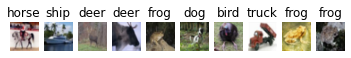

In [29]:
fig, ax = plt.subplots(1,10)
shapes = []

num_to_name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse",
"ship", "truck"]

# TODO: print names instead of numerical labels
for i, (img, lbl) in enumerate(train_data):
    if i == 10:
        break
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(num_to_name[lbl.numpy()])
    ax[i].axis("off")
    shapes.append(img.shape)

print(shapes)    

## Define some constants

In [30]:
# arbitrarily set. Feel free to change these
PREFETCH_SIZE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128

## Prepare data

In [44]:
def process_inp_and_label(input, label):
    """ rescale inputs and onehotify labels """
    new_input = input / 255
    return new_input, tf.one_hot(label, 10)

def data_pipeline(data):
    """ helper function for data pipeline - does all the things we need """
    data = data.map(process_inp_and_label)
    # arbitrarily set buffer_size - feel free to use sth. else
    data = data.shuffle(buffer_size=BATCH_SIZE)
    data = data.batch(BATCH_SIZE)
    data = data.prefetch(PREFETCH_SIZE)
    return data

train_data = data_pipeline(train_data)
test_data = data_pipeline(test_data)

In [45]:
# compile and fit model
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics='accuracy')
# validation_data=train_data makes sure that model tests on train_data after each epoch
model.fit(x=train_data, epochs=10, validation_data=train_data)

Epoch 1/10
  2/391 [..............................] - ETA: 37s - loss: 4.7300 - accuracy: 0.1367WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0726s vs `on_train_batch_end` time: 0.1215s). Check your callbacks.


391/391 [==============================] - 100s 257ms/step - loss: 2.8115 - accuracy: 0.4729 - val_loss: 1.1337 - val_accuracy: 0.5970
Epoch 2/10
391/391 [==============================] - 99s 253ms/step - loss: 2.3475 - accuracy: 0.6307 - val_loss: 1.0062 - val_accuracy: 0.6743
Epoch 3/10
391/391 [==============================] - 99s 254ms/step - loss: 2.2417 - accuracy: 0.6790 - val_loss: 0.6692 - val_accuracy: 0.7670
Epoch 4/10
391/391 [==============================] - 99s 254ms/step - loss: 2.1497 - accuracy: 0.7107 - val_loss: 0.6761 - val_accuracy: 0.7688
Epoch 5/10
391/391 [==============================] - 99s 254ms/step - loss: 2.1072 - accuracy: 0.7293 - val_loss: 0.5273 - val_accuracy: 0.8165
Epoch 6/10
391/391 [==============================] - 99s 254ms/step - loss: 2.0417 - accuracy: 0.7490 - val_loss: 0.5656 - val_accuracy: 0.8073
Epoch 7/10
391/391 [==============================] - 99s 254ms/step - loss: 2.0219 - accuracy: 0.7615 - val_loss: 0.4200 - val_accuracy: 0.

{'accuracy': [0.47290000319480896,
  0.6306999921798706,
  0.6790400147438049,
  0.7106800079345703,
  0.7293000221252441,
  0.7490400075912476,
  0.7614799737930298,
  0.7773200273513794,
  0.7849199771881104,
  0.7932400107383728],
 'loss': [2.8115482330322266,
  2.347477436065674,
  2.241743803024292,
  2.1497185230255127,
  2.107231616973877,
  2.041691541671753,
  2.021946430206299,
  1.974685788154602,
  1.9572091102600098,
  1.9496557712554932],
 'val_accuracy': [0.5969799757003784,
  0.6743000149726868,
  0.7670199871063232,
  0.7687600255012512,
  0.8164600133895874,
  0.8072999715805054,
  0.8535799980163574,
  0.871399998664856,
  0.8851799964904785,
  0.8959199786186218],
 'val_loss': [1.1337335109710693,
  1.0061895847320557,
  0.6691825985908508,
  0.6761350631713867,
  0.5272673964500427,
  0.5656467080116272,
  0.4199853539466858,
  0.37110456824302673,
  0.32991984486579895,
  0.2955602705478668]}

## Define helper functions

In [54]:
# TODO: uncomment if I want to use again
"""
def train_step(model, input, target, loss_function, optimizer):
    accuracy = None

    # loss_object and optimizer_object are instances of respective tensorflow classes
    with tf.GradientTape() as tape:
        prediction = model(input)
        accuracy = np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
        loss = loss_function(target, prediction)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    accuracy = np.mean(accuracy)

    return loss, accuracy

def test(model, test_data, loss_function):
    # test over complete test data

    test_accuracy_aggregator = []
    test_loss_aggregator = []

    for (input, target) in test_data:
        prediction = model(input)
        # TODO: remove
        print(prediction)
        sample_test_loss = loss_function(target, prediction)
        sample_test_accuracy = np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
        sample_test_accuracy = np.mean(sample_test_accuracy)
        test_loss_aggregator.append(sample_test_loss.numpy())
        test_accuracy_aggregator.append(sample_test_accuracy)

    test_loss = np.mean(test_loss_aggregator)
    test_accuracy = np.mean(test_accuracy_aggregator)

    return test_loss, test_accuracy
"""

def plot_stats(train_stat, test_stat, stat_name):
    plt.figure()
    line1, = plt.plot(train_stat)
    line2, = plt.plot(test_stat)
    plt.xlabel("Training steps")
    plt.ylabel(stat_name)
    plt.legend((line1, line2), ("training", "test"))
    plt.show()

In [12]:
tf.keras.backend.clear_session()

## Prepare for training

In [13]:
"""
num_epochs = 10
learning_rate = 0.001
# set to 0 if you want to use mean instead of running average
running_average_factor = 0
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate)

# define calc_stat here to access running_average_factor
def calc_stat(stat_so_far, new_stat, stat_num):
    """Calculates appropriate statistic

    :param stat_so_far: the statistic that we have observed so far
    :param new_stat: the newest observed statistic
    :param stat_num: new_stat is the stat_num-th observed statistic
    :return: if 0, return mean, else running average
    """

    if running_average_factor:
        return running_average_factor * stat_so_far + (1 - running_average_factor) * new_stat
    # calculate mean of observed statistics so far
    return ((stat_num - 1) * stat_so_far + new_stat) / stat_num

# Initialize lists for later visualization.
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
"""

##Train

In [ ]:
"""
for epoch in range(num_epochs):
    print('Epoch: ' + str(epoch+1))

    # shuffle train data. No need to shuffle test data
    train_data = train_data.shuffle(buffer_size=BATCH_SIZE)

    train_loss_stat = 0
    train_accuracy_stat = 0
    for i, (input, target) in enumerate(train_data):
        train_loss, train_accuracy = train_step(model, input, target, loss, optimizer)
        train_loss_stat = calc_stat(train_loss_stat, train_loss, i+1)
        train_accuracy_stat = calc_stat(train_accuracy_stat, train_accuracy, i+1)
    train_losses.append(train_loss_stat)
    train_accuracies.append(train_accuracy_stat)

    # testing
    test_loss, test_accuracy = test(model, test_data, loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(test_accuracy)
    """

Epoch: 1


## Prepare stats for plotting

In [52]:
# get model history collected during fitting
stats = model.history.history

train_losses = stats['loss']
test_losses = stats['val_loss']
train_accuracies = stats['accuracy']
test_accuracies = stats['val_accuracy']

##Plot

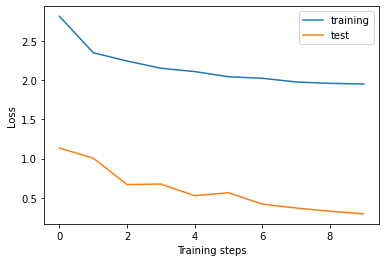

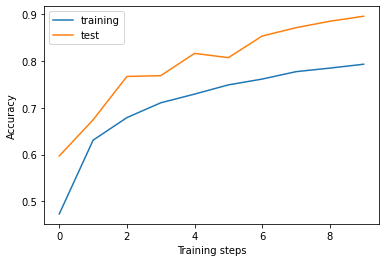

In [55]:
# model consistently performs better on test set than training set due to dropout
plot_stats(train_losses, test_losses, "Loss")
plot_stats(train_accuracies, test_accuracies, "Accuracy")

## Assert test accuracy over 85%

In [56]:
assert test_accuracies[-1] >= 0.85
print(test_accuracies)

[0.5969799757003784, 0.6743000149726868, 0.7670199871063232, 0.7687600255012512, 0.8164600133895874, 0.8072999715805054, 0.8535799980163574, 0.871399998664856, 0.8851799964904785, 0.8959199786186218]
